In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [15]:
adata = sc.read_h5ad('../data/mtDNA_DSB_5k_clustered_LLM_anno.h5ad')

In [16]:
adata = adata[adata.obs.cell_class.str.contains('ligo')]

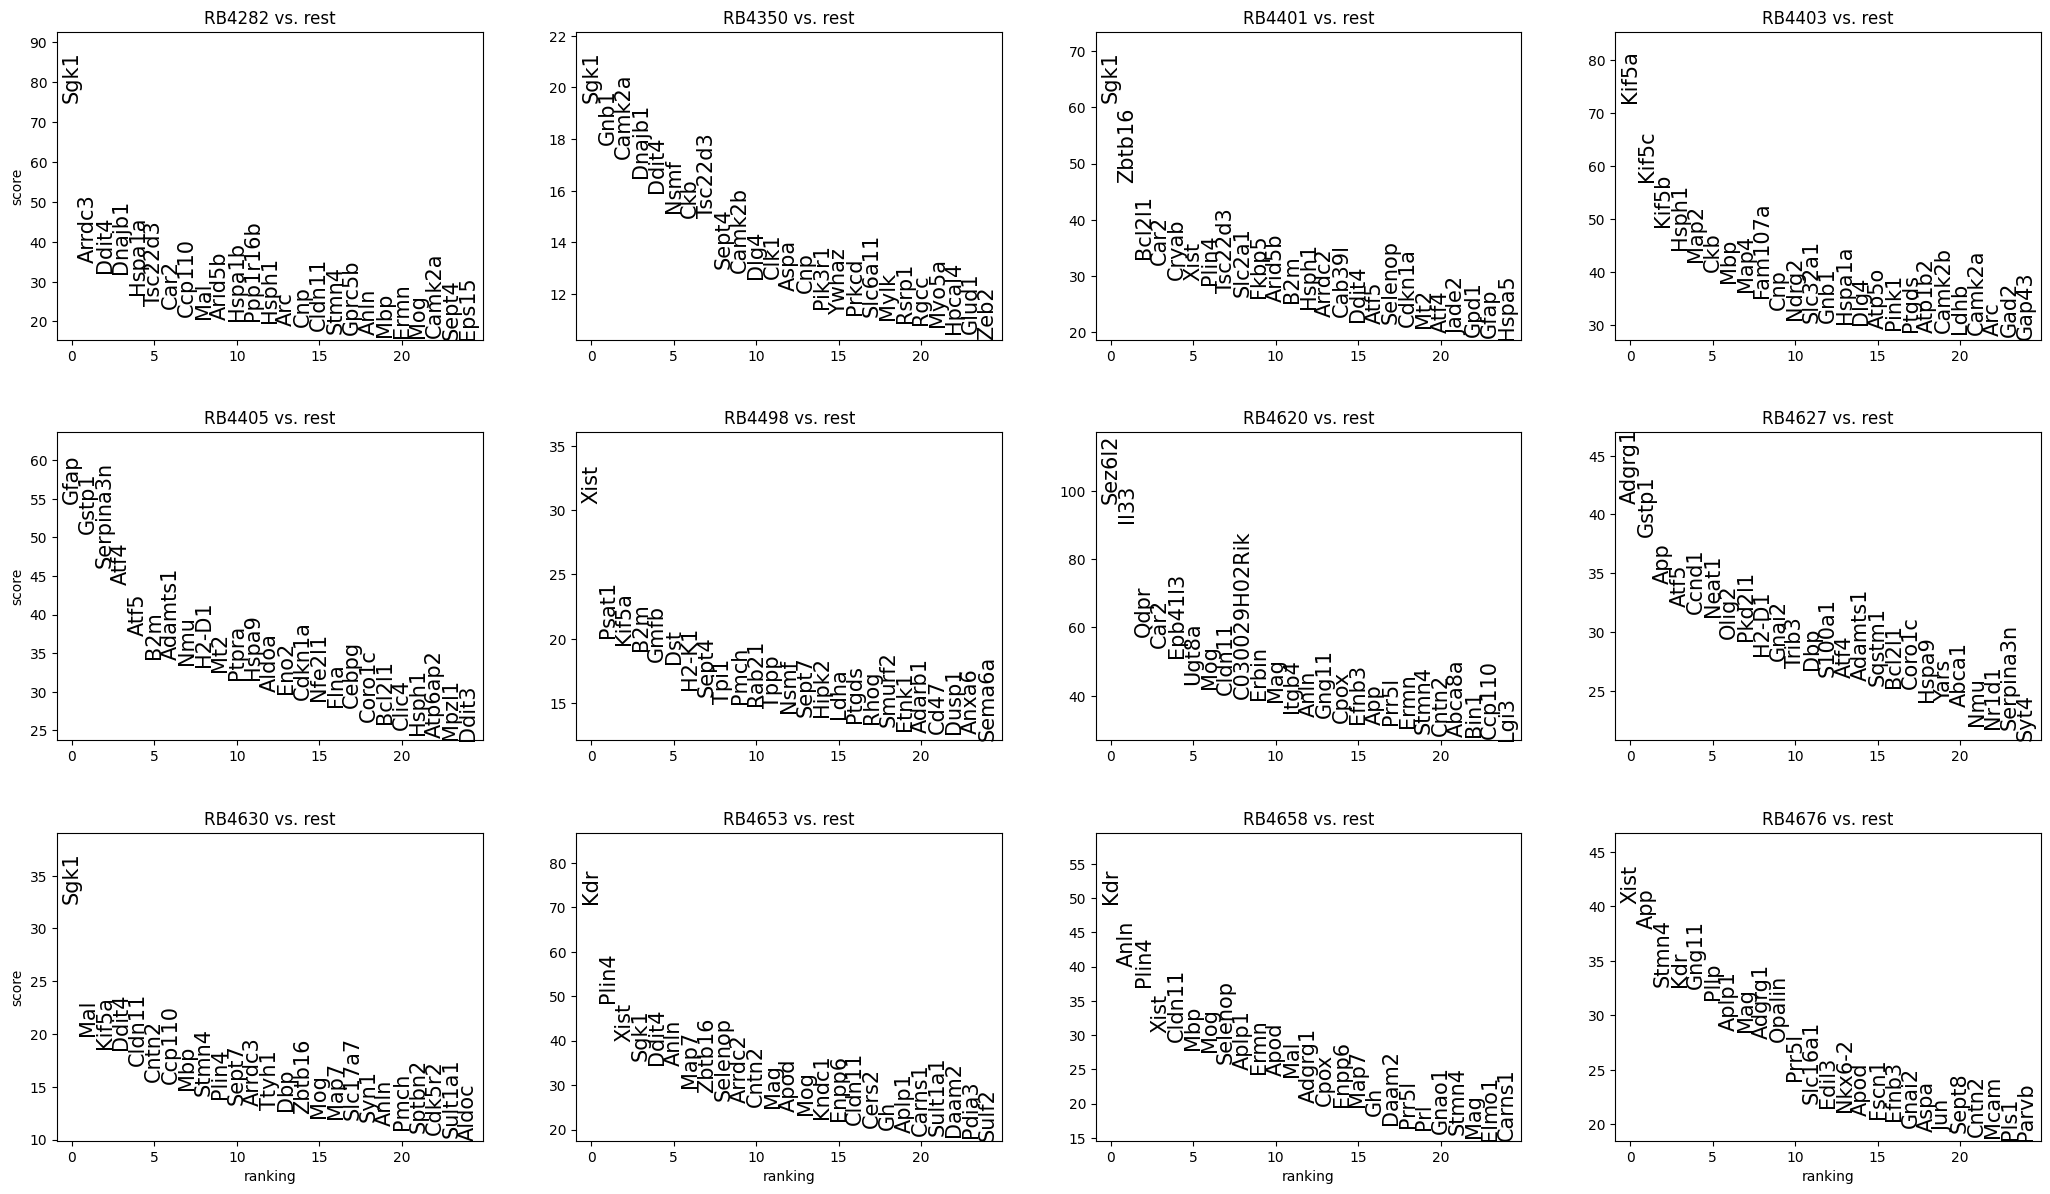

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,RB4282,Sgk1,74.781410,1.356854,0.000000e+00,0.000000e+00
1,RB4282,Arrdc3,34.829838,0.700323,2.187889e-259,1.860070e-256
2,RB4282,Ddit4,32.324142,0.518208,1.472521e-224,1.073047e-221
3,RB4282,Dnajb1,32.107536,0.727360,1.484066e-221,9.462774e-219
4,RB4282,Hspa1a,26.646566,1.291910,4.036742e-154,1.715952e-151


In [17]:
# --- Find marker genes per cluster ---
sc.tl.rank_genes_groups(adata, groupby="sample_id", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, fontsize = 15)

# get a tidy table of top markers
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers.head()

In [18]:
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers.head()

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,RB4282,Sgk1,74.781410,1.356854,0.000000e+00,0.000000e+00
1,RB4282,Arrdc3,34.829838,0.700323,2.187889e-259,1.860070e-256
2,RB4282,Ddit4,32.324142,0.518208,1.472521e-224,1.073047e-221
3,RB4282,Dnajb1,32.107536,0.727360,1.484066e-221,9.462774e-219
4,RB4282,Hspa1a,26.646566,1.291910,4.036742e-154,1.715952e-151


In [21]:
marker_genes = pd.DataFrame({
    group: adata.uns['rank_genes_groups']['names'][group][:10]
    for group in adata.uns['rank_genes_groups']['names'].dtype.names
})
marker_genes.head()
#marker_genes.to_csv('../data/broad_markers_leiden0-5.csv')

,RB4282,RB4350,RB4401,RB4403,RB4405,RB4498,RB4620,RB4627,RB4630,RB4653,RB4658,RB4676
0,Sgk1,Sgk1,Sgk1,Kif5a,Gfap,Xist,Sez6l2,Adgrg1,Sgk1,Kdr,Kdr,Xist
1,Arrdc3,Gnb1,Zbtb16,Kif5c,Gstp1,Psat1,Il33,Gstp1,Mal,Plin4,Anln,App
2,Ddit4,Camk2a,Bcl2l1,Kif5b,Serpina3n,Kif5a,Qdpr,App,Kif5a,Xist,Plin4,Stmn4
3,Dnajb1,Dnajb1,Car2,Hsph1,Atf4,B2m,Car2,Atf5,Ddit4,Sgk1,Xist,Kdr
4,Hspa1a,Ddit4,Cryab,Map2,Atf5,Gmfb,Epb41l3,Ccnd1,Cldn11,Ddit4,Cldn11,Gng11


In [22]:
combined_list = []
for col in marker_genes.columns: 
    print(col)
    genes = marker_genes[col].tolist()
    print(" ".join(genes))
    print(' ')
    combined_list.append(genes)
combined_list = [item for sublist in combined_list for item in sublist]
print()

RB4282
Sgk1 Arrdc3 Ddit4 Dnajb1 Hspa1a Tsc22d3 Car2 Ccp110 Mal Arid5b
 
RB4350
Sgk1 Gnb1 Camk2a Dnajb1 Ddit4 Nsmf Ckb Tsc22d3 Sept4 Camk2b
 
RB4401
Sgk1 Zbtb16 Bcl2l1 Car2 Cryab Xist Plin4 Tsc22d3 Slc2a1 Fkbp5
 
RB4403
Kif5a Kif5c Kif5b Hsph1 Map2 Ckb Mbp Map4 Fam107a Cnp
 
RB4405
Gfap Gstp1 Serpina3n Atf4 Atf5 B2m Adamts1 Nmu H2-D1 Mt2
 
RB4498
Xist Psat1 Kif5a B2m Gmfb Dst H2-K1 Sept4 Tpi1 Pmch
 
RB4620
Sez6l2 Il33 Qdpr Car2 Epb41l3 Ugt8a Mog Cldn11 C030029H02Rik Erbin
 
RB4627
Adgrg1 Gstp1 App Atf5 Ccnd1 Neat1 Olig2 Pkd2l1 H2-D1 Gnai2
 
RB4630
Sgk1 Mal Kif5a Ddit4 Cldn11 Cntn2 Ccp110 Mbp Stmn4 Plin4
 
RB4653
Kdr Plin4 Xist Sgk1 Ddit4 Anln Map7 Zbtb16 Selenop Arrdc2
 
RB4658
Kdr Anln Plin4 Xist Cldn11 Mbp Mog Selenop Aplp1 Ermn
 
RB4676
Xist App Stmn4 Kdr Gng11 Pllp Aplp1 Mag Adgrg1 Opalin
 



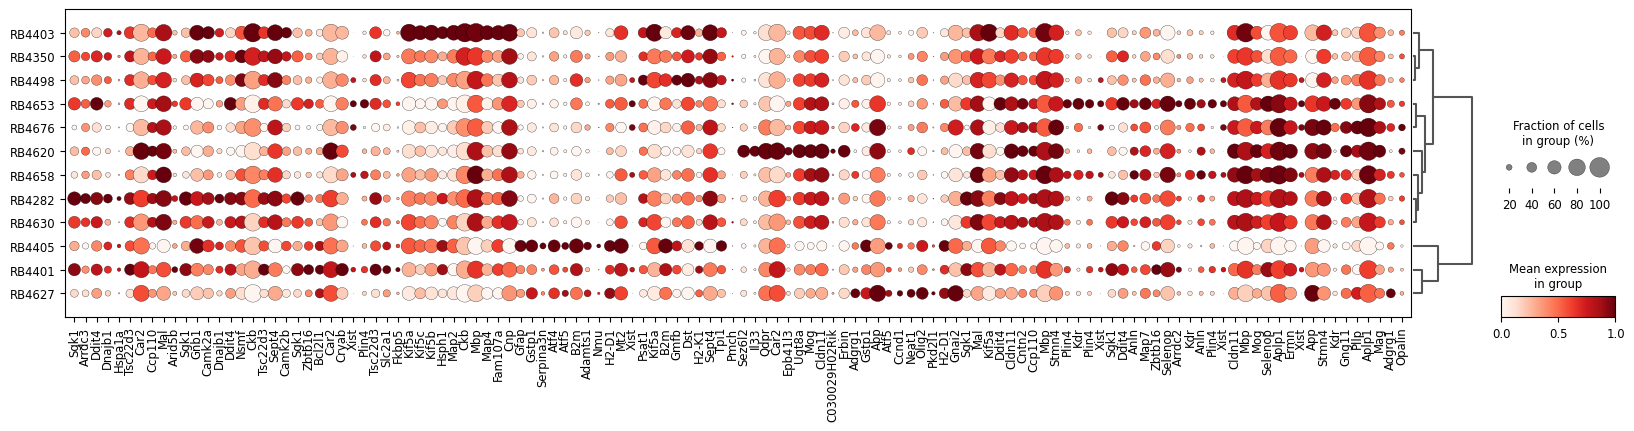

In [24]:
sc.pl.dotplot(
        adata,
        var_names=combined_list,
        groupby="sample_id",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        
        dendrogram=True,
        figsize=(20, 4)
    )

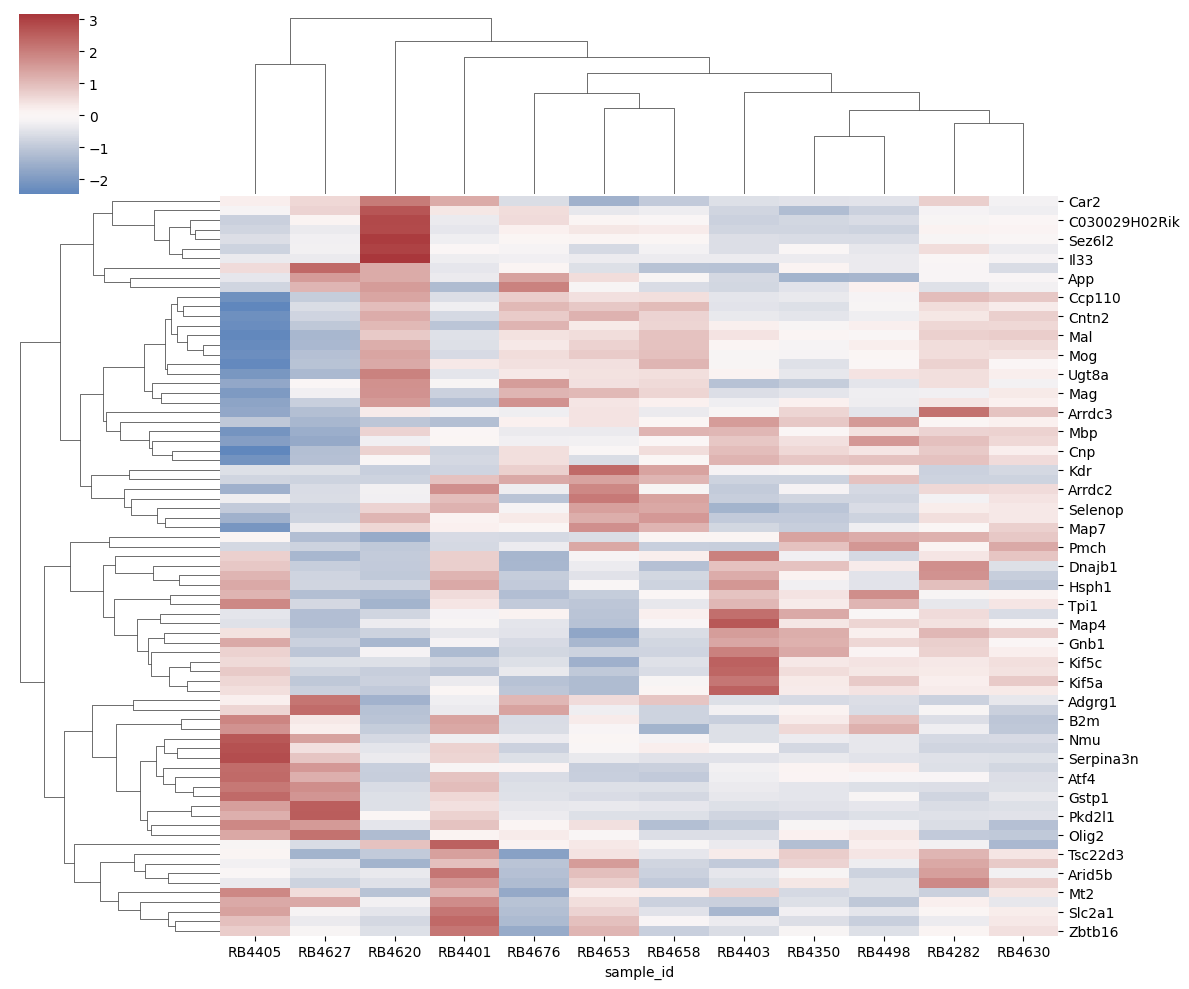

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pseudobulk per sample_id
pb = adata.to_df().groupby(adata.obs["sample_id"]).mean()

# keep only marker genes
all_markers =combined_list#[g for genes in marker_modules.values() for g in genes]
pb_markers = pb.loc[:, pb.columns.intersection(all_markers)]

# scale by gene
pb_scaled = (pb_markers - pb_markers.mean(axis=0)) / pb_markers.std(axis=0)

# clustered heatmap
sns.clustermap(
    pb_scaled.T,
    col_cluster=True, row_cluster=True,
    cmap="vlag", center=0,
    figsize=(12, 10)
)
plt.show()

In [27]:
sample_annotations_balanced_OL = {
    "RB4282": "DSB",
    "RB4350": "DSB",
    "RB4403": "DSB",
    "RB4405": "DSB",
    "RB4630": "DSB",
    "RB4401": "DSB",        # swing sample, assigned to DSB for balance
    "RB4498": "Control",
    "RB4620": "Control",
    "RB4627": "Control",
    "RB4653": "Control",
    "RB4658": "Control",
    "RB4676": "Control"
}

In [29]:
adata.obs["condition_predicted"] = adata.obs["sample_id"].map(sample_annotations_balanced_OL)

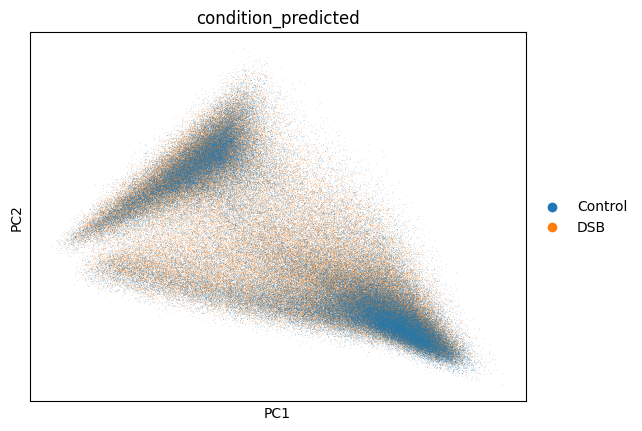

In [31]:
sc.pl.pca(adata, color="condition_predicted")

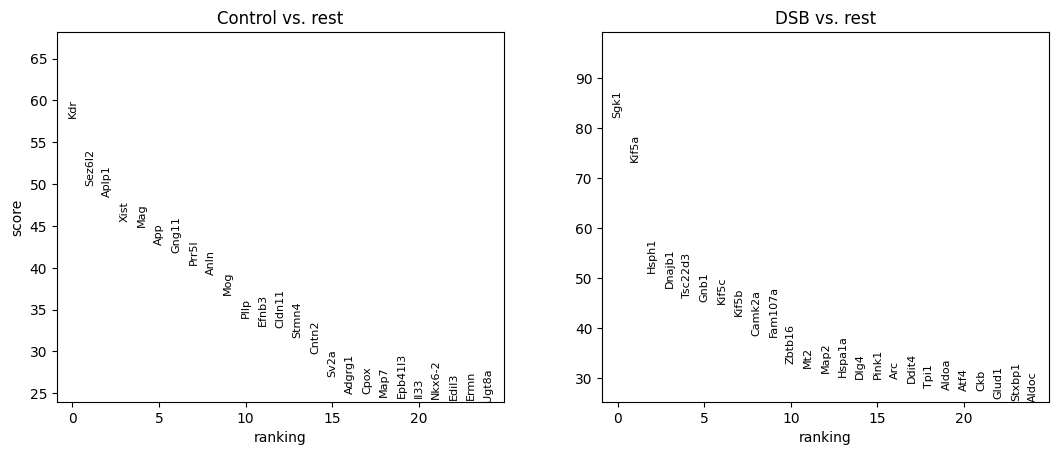

In [32]:
sc.tl.rank_genes_groups(adata, groupby="condition_predicted", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [33]:
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers.head()

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,Control,Kdr,57.968868,1.437889,0.0,0.0
1,Control,Sez6l2,49.781666,1.175018,0.0,0.0
2,Control,Aplp1,48.439159,0.241879,0.0,0.0
3,Control,Xist,45.462173,2.313868,0.0,0.0
4,Control,Mag,44.844585,0.499363,0.0,0.0


In [36]:
marker_genes = pd.DataFrame({
    group: adata.uns['rank_genes_groups']['names'][group][:15]
    for group in adata.uns['rank_genes_groups']['names'].dtype.names
})
marker_genes.head()
#marker_genes.to_csv('../data/broad_markers_leiden0-5.csv')

,Control,DSB
0,Kdr,Sgk1
1,Sez6l2,Kif5a
2,Aplp1,Hsph1
3,Xist,Dnajb1
4,Mag,Tsc22d3


In [37]:
combined_list = []
for col in marker_genes.columns: 
    print(col)
    genes = marker_genes[col].tolist()
    print(" ".join(genes))
    print(' ')
    combined_list.append(genes)
combined_list = [item for sublist in combined_list for item in sublist]
print()

Control
Kdr Sez6l2 Aplp1 Xist Mag App Gng11 Prr5l Anln Mog Pllp Efnb3 Cldn11 Stmn4 Cntn2
 
DSB
Sgk1 Kif5a Hsph1 Dnajb1 Tsc22d3 Gnb1 Kif5c Kif5b Camk2a Fam107a Zbtb16 Mt2 Map2 Hspa1a Dlg4
 



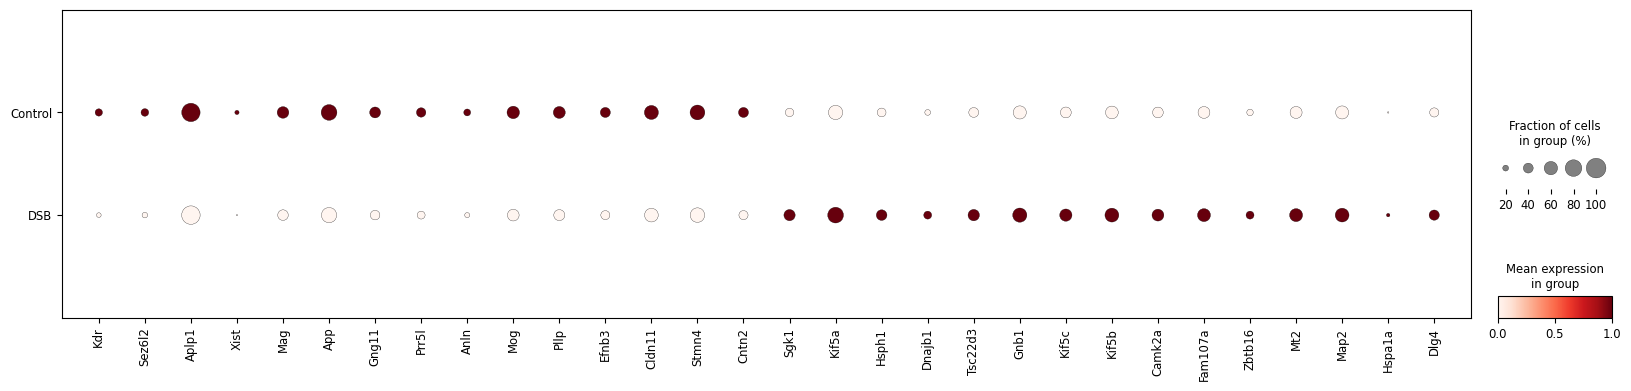

In [39]:
sc.pl.dotplot(
        adata,
        var_names=combined_list,
        groupby="condition_predicted",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        
        dendrogram=True,
        figsize=(20, 4)
    )

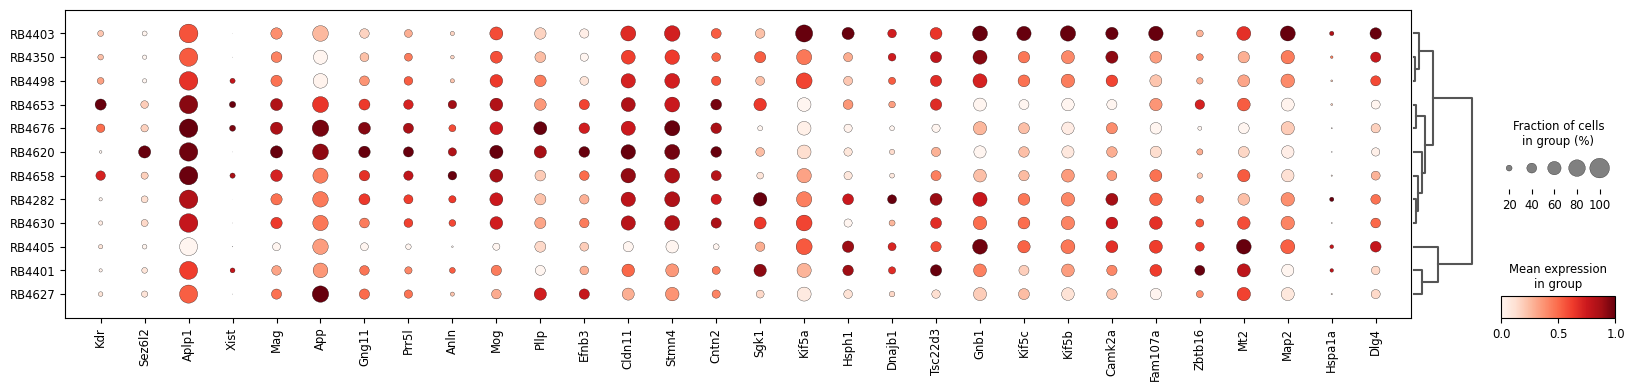

In [40]:
sc.pl.dotplot(
        adata,
        var_names=combined_list,
        groupby="sample_id",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        
        dendrogram=True,
        figsize=(20, 4)
    )

In [ ]:
sample_annotations_balanced_OL = {
    "RB4282": "DSB",
    "RB4350": "DSB",
    "RB4403": "DSB",
    "RB4405": "DSB",
    "RB4630": "DSB",
    "RB4401": "DSB",        # swing sample, assigned to DSB for balance
    "RB4498": "Control",
    "RB4620": "Control",
    "RB4627": "Control",
    "RB4653": "Control",
    "RB4658": "Control",
    "RB4676": "Control"
}